## Домашнее задание «Проблема качества данных»

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import IsolationForest

1. Получите и загрузите данные

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберите и посчитайте метрику качества.

In [5]:
data = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
data = data[pd.isnull(data['Age']) == 0]
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   714 non-null    int64  
 3   Parch   714 non-null    int64  
 4   Fare    714 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


In [7]:
y = data['Survived']
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

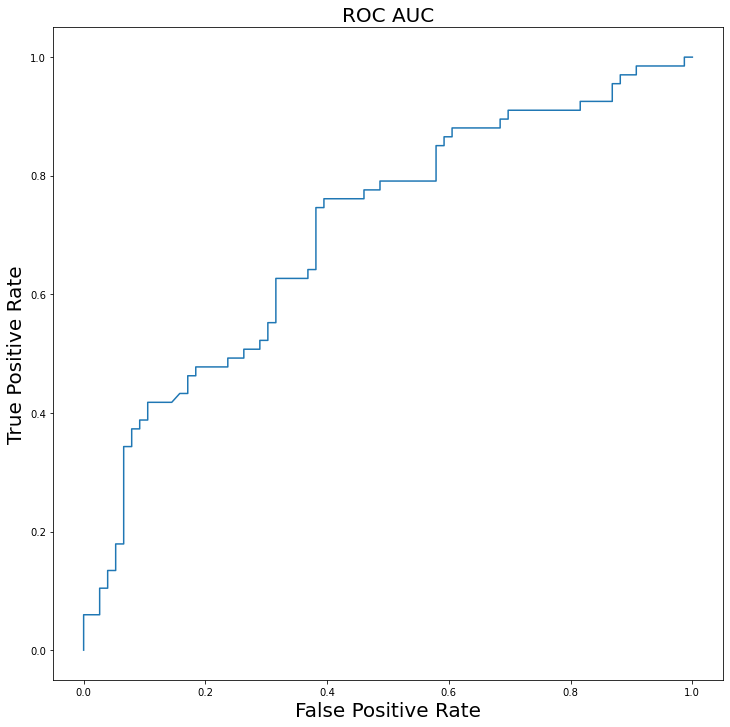

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 20})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

In [10]:
roc_auc_score(y_test, predictions[:, 1])

0.7051256873527102

3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.

    a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

    b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
6. Категориальные переменные переведите в цифровые значения. Можно использовать [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.

    a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9. *Попробуйте математически преобразовать признак Age.
10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [11]:
data = pd.read_csv("train.csv")

Очевидно, что идентификатор пользователя и его имя, а также номер билета никакого значения не имеют, как параметры уникальные и случайные, их исключаем из рассмотрения. Номер каюты также уникален, и хотя он может коррелировать с благосостоянием пассажира, но у нас нет сведений о разделении номеров по классам их качества, кроме того, их всего заполнено 204 из исходных 891 пассажиров, что очень мало - номера кают тоже исключаем. Сомнительно, чтобы порт посадки Embarked мог бы оказать влияние, но все же также возможна косвенная корреляция с благосостоянием, даже если небольшая, поэтому оставим этот параметр. Остальные параметры сохраняем, категориальные из них - преобразуем.

In [12]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Мы видим, что есть пропуски для возраста и данных о спасении. Немного странно, что о двух человеках неизвесто,в каком городе они сели на корабль, здесь разумно будет заполнить их городом, где село больше всего пассажиров, пусть мы хотим по возможности не терять данные совсем. Если просто удалить пропуски, мы получим почти 20% потерь

In [13]:
maxPassEmbarked = data.groupby('Embarked').count()['Fare']
data.Embarked[data.Embarked.isnull()] = maxPassEmbarked[maxPassEmbarked == maxPassEmbarked.max()].index[0]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Возраст не заполнен в 20% случаев, разумно будет заменить его медианным значением возраста из числа заполненных

In [16]:
medianAge = data[data.Age.notnull()]['Age'].median()
print(medianAge)

28.0


In [17]:
data.Age[data.Age.isnull()] = medianAge
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Теперь преобразуем категориальные переменные

In [18]:
cat_columns = ['Sex', 'Embarked']
data = pd.get_dummies(data, columns=cat_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


Данные многомерные, по идее, неплохо должен отработать метод изоляционного леса для поиска выбросов https://digitrain.ru/articles/368904/

In [51]:
clf = IsolationForest( max_samples=891, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(data)
len(np.where(preds == -1)[0])


264

Насколько я понял в описании метода, полученные им "выбросы" могут быть ложными. В данных мы видим параметры, которые вполне могут быть как сильно, так и частично взаимозависимыми - например, Pclass (социальный статус), Fare(цена билета), это может приводить к таким ложным "выбросам". Для их устранения можно было бы удалить один из связанных параметров или заменить их каким-то комбинированным параметром. Но это слишком сложно для этих данных, так как затруднительно представить себе разумное предположение о формуле комбинированных параметров. К тому же искажения могут быть внесены, например, тем, что люди с большой семьей и высоким доходом все равно явно должны иметь меньше шансов на спасение, так как у людей есть склонность не бросать семью в беде.Из всех этих соображений я предпочту не удалять выбросы вообще, чтобы не потерять данные для анализа.
Нарисуем для примера несколько графиков.

<AxesSubplot:title={'center':'Pclass'}, xlabel='Pclass'>

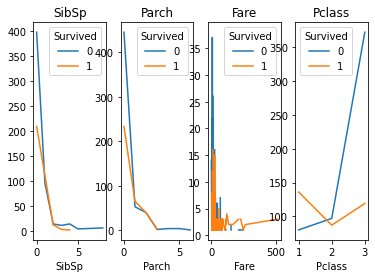

In [63]:
dt = pd.read_csv('train.csv')
fig, axes = plt.subplots(ncols=4)
dt.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
dt.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')
dt.pivot_table('PassengerId', ['Fare'], 'Survived', 'count').plot(ax=axes[2], title='Fare')
dt.pivot_table('PassengerId', ['Pclass'], 'Survived', 'count').plot(ax=axes[3], title='Pclass')

Мы видим, что с ростом числа родственников вероятность спастись резко падает. Для людей с высокой стоимостью билета или высоким социальным статусом отношение числа спасшихся к числу погибших выше, чем у бедных или низкопоставленных людей.

Попробуем преобразовать признак Age путем деления его на три категории - до 14 лет, от 14 до 30 лет и старше 30 лет

In [74]:
data.Age[data.Age < 14.0] = 1.0
data.Age[(data.Age >= 14.0) & (data.Age < 30.0)] = 2.0
data.Age[data.Age >= 30.0] = 3.0
data.head(10)

/tmp/ipykernel_113972/4080094676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Age[data.Age < 14.0] = 1.0
/tmp/ipykernel_113972/4080094676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Age[(data.Age >= 14.0) & (data.Age < 30.0)] = 2.0
/tmp/ipykernel_113972/4080094676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Age[data.Age >= 30.0] = 3.0


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1.0,1,0,7.2500,0,1,0,0,1
1,1,1,3.0,1,0,71.2833,1,0,1,0,0
2,1,3,1.0,0,0,7.9250,1,0,0,0,1
3,1,1,3.0,1,0,53.1000,1,0,0,0,1
4,0,3,3.0,0,0,8.0500,0,1,0,0,1
5,0,3,1.0,0,0,8.4583,0,1,0,1,0
6,0,1,3.0,0,0,51.8625,0,1,0,0,1
7,0,3,1.0,3,1,21.0750,0,1,0,0,1
8,1,3,1.0,0,2,11.1333,1,0,0,0,1
9,1,2,1.0,1,0,30.0708,1,0,1,0,0


Теперь можно снова обучить модель и посчитать метрику качества

/home/stranger/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


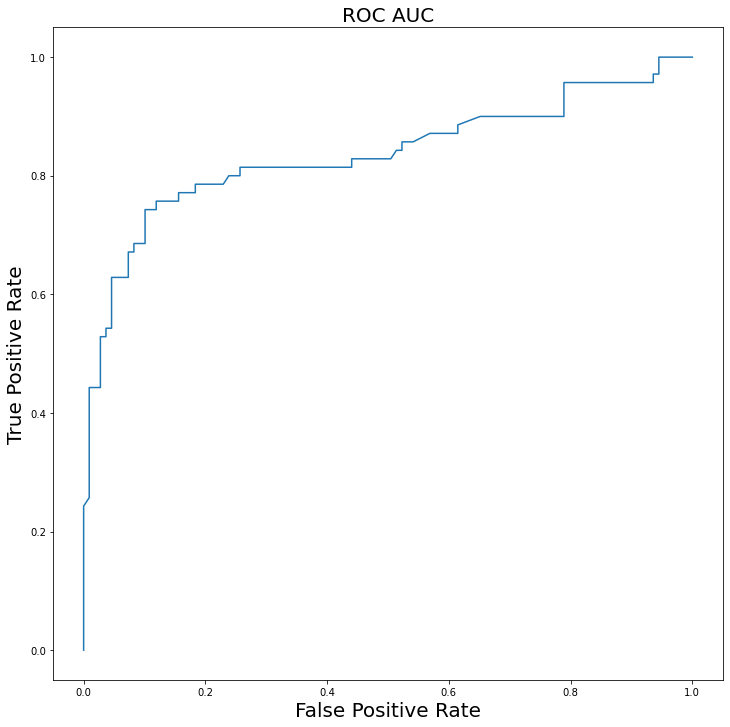

In [79]:
X = data.loc[:, data.columns != 'Survived']
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:, 1])
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 20})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

In [80]:
roc_auc_score(y_test, predictions[:, 1])

0.8355176933158585

Общий вывод по результатам работы: удаление данных с пропусками вполне может приводит к значительной потере качества модели, что видно из сравнения метрик качества. Лучше все-таки пытаться очистить данные от пропусков различными методоми замены пропусков на какие-то адекватные значения - это повышает качество модели, особенно, когда данных для анализа не слишком много.